In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df['type'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [8]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'type'],
      dtype='object')

In [10]:
df.dropna(subset=['lat', 'lng']).drop(columns=['desc', 'title', 'timeStamp', 'twp', 'addr', 'e'])

,lat,lng,zip,type
0,40.297876,-75.581294,19525.0,EMS
1,40.258061,-75.264680,19446.0,EMS
2,40.121182,-75.351975,19401.0,Fire
3,40.116153,-75.343513,19401.0,EMS
4,40.251492,-75.603350,NaN,EMS
...,...,...,...,...
99487,40.132869,-75.333515,19401.0,Traffic
99488,40.006974,-75.289080,19003.0,Traffic
99489,40.115429,-75.334679,19401.0,EMS
99490,40.186431,-75.192555,19002.0,EMS


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   type       99492 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [14]:
zip_counts = df.groupby(['zip', 'type']).size().unstack().fillna(0)

In [15]:
zip_counts

type,EMS,Fire,Traffic
zip,,,
17752.0,1.0,0.0,0.0
18036.0,2.0,0.0,0.0
18041.0,273.0,84.0,57.0
18054.0,146.0,56.0,124.0
18056.0,4.0,2.0,0.0
...,...,...,...
19512.0,177.0,9.0,34.0
19518.0,55.0,1.0,1.0
19525.0,510.0,160.0,295.0


In [16]:
zip_counts_norm = zip_counts.div(zip_counts.sum(axis=1), axis=0)

In [17]:
zip_counts_norm

type,EMS,Fire,Traffic
zip,,,
17752.0,1.000000,0.000000,0.000000
18036.0,1.000000,0.000000,0.000000
18041.0,0.659420,0.202899,0.137681
18054.0,0.447853,0.171779,0.380368
18056.0,0.666667,0.333333,0.000000
...,...,...,...
19512.0,0.804545,0.040909,0.154545
19518.0,0.964912,0.017544,0.017544
19525.0,0.528497,0.165803,0.305699


In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)

In [20]:
kmeans.fit(zip_counts_norm)

C:\Users\kkhan\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

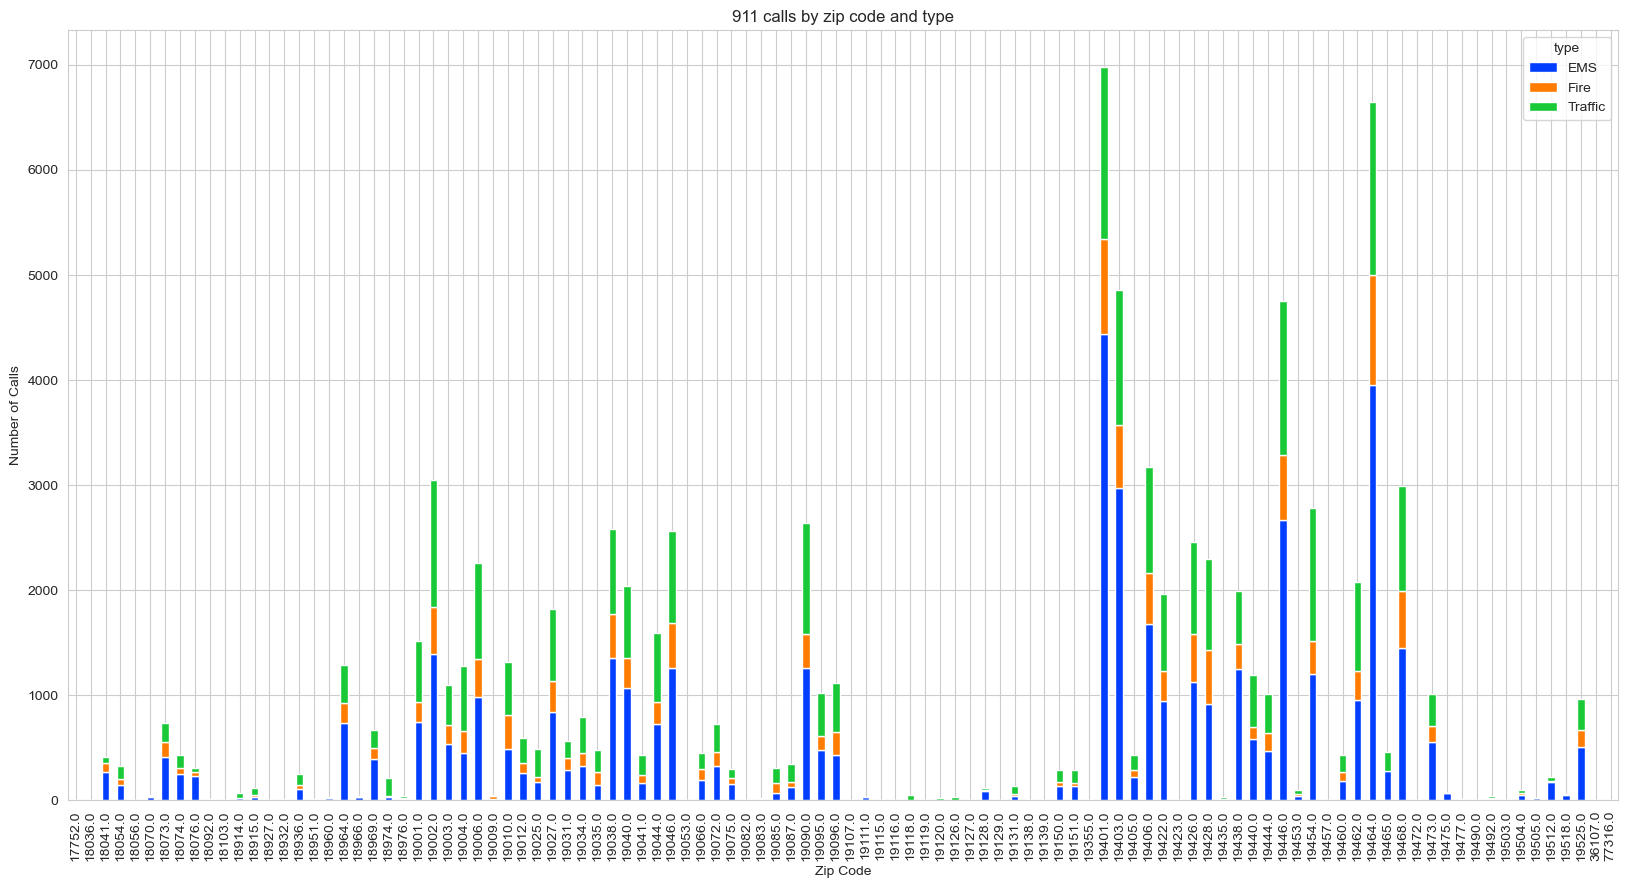

In [22]:
import seaborn as sns
from pandas.core.reshape.pivot import pivot
pivot = pd.pivot_table(df, index='zip', columns='type', values='lat', aggfunc='count')

sns.set_style('whitegrid')
sns.set_palette('bright')
pivot.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('911 calls by zip code and type')
plt.xlabel('Zip Code')
plt.ylabel('Number of Calls')
plt.show()